# 作业4 灰度变换拟合

### 作业内容
- 在（0，1）范围内随机设定5对(x,y)值（包含(0,0)和(1,1)），并利用其构建4阶拟合多项式。分别使用Numpy.polyfit函数拟合，和使用矩阵手写拟合，对比结果


- 利用拟合多项式曲线作为变换函数对灰度图像进行处理，给出处理结果


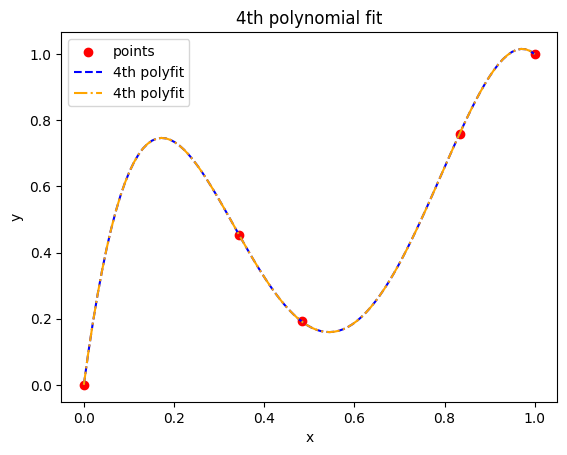

numpy拟合多项式的系数:
 [-28.01734249  63.0916046  -44.31423488  10.23997277   0.        ]
手写拟合系数:
 [-28.01734249  63.0916046  -44.31423488  10.23997277   0.        ]


In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

random_points = np.random.uniform(0,1,size=(3,2))
points = np.vstack([[0, 0], random_points, [1, 1]])

x = points[:, 0]
y = points[:, 1]

z1 = np.poly1d(np.polyfit(x, y, 4))

# 手写方法，vandermonde矩阵求逆
V = np.vander(x, 5)
# 解线性方程组 V · a = y 来求解系数 a
a = np.linalg.inv(V).dot(y)
z2 = np.poly1d(a)

x_fit = np.linspace(0, 1, 100)
plt.scatter(x, y, color='red', label='points')
plt.plot(x_fit, z2(x_fit),linestyle="--", color='blue', label='4th polyfit')
plt.plot(x_fit, z1(x_fit),linestyle="-.", color='orange', label='4th polyfit')
plt.legend()
plt.title('4th polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 输出拟合的多项式
print("numpy拟合多项式的系数:\n", np.polyfit(x,y,4))
print("手写拟合系数:\n",a)

&emsp;灰度变换是图像处理的基本操作，数学描述为：
$$g(x,y)=T(f(x,y))$$
&emsp;其中：$f(x,y)$是输入图像在$(x,y)$位置的灰度值，$g(x,y)$为该位置的输出值，$T()$是变换函数。

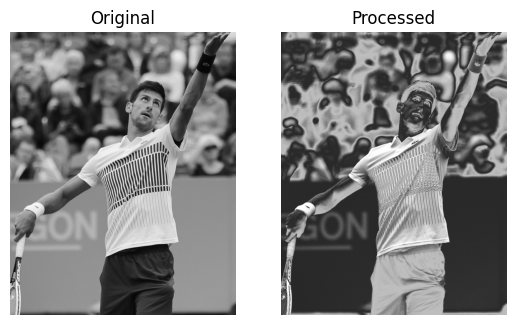

In [56]:
# 根据拟合曲线构建映射表
map_1 = np.zeros(256)
x = np.linspace(0, 1, 256)
for i in np.arange(256):
    temp = z1(x[i])
    if temp > 1:
        map_1[i] = 1
    elif temp < 0:
        map_1[i] = 0
    else:
        map_1[i] = temp
# 通过查表方式实现映射
def f_1(x):
    return map_1[x]

img = plt.imread("Novak.jpg")

# f_1仅对单个标量进行操作，frompyfunc函数让其支持对图像每个像素的处理
im_1 = np.frompyfunc(f_1,1,1)(img).astype(float)

plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(im_1)
plt.axis('off')
plt.title('Processed')
plt.show()